# Dağılım Grafikleri

## Barplot

In [1]:
# Sütun grafiği.
# Kategorik değişkenleri görselleştirmek için kullanılır.

**Veri Seti Hikayesi**
* price: dolar cinsinden fiyat (326 - 18,823)
* carat: ağırlık (0,2 - 5,01)
* cut: kalite (Fair, Good, Very Good, Premium, Ideal)
* color: renk (from J (worst) to D (best))
* clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0 - 10,74)
* y: width in mm (0 - 58,9)
* z: depth in mm (0 - 31,8)
* depth: toplam derinlik yüzdesi = z/mean(x,y) = 2 * z / (x+y) (43-79)
* table: elmasın en geniş noktasına göre genişliği (43 - 95)

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
df_kat = df.select_dtypes(include = [object])
df_kat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [6]:
df_kat["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
df_kat["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [8]:
# ordinal tanımlama
from pandas.api.types import CategoricalDtype
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [9]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [10]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(ordered = True, categories = cut_kategoriler))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

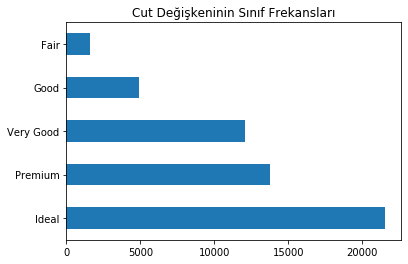

In [11]:
# barplot
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

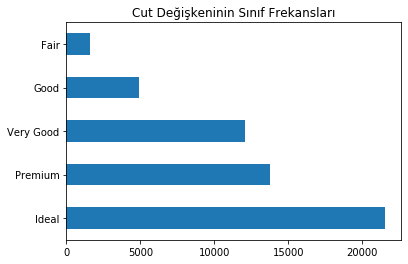

In [12]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

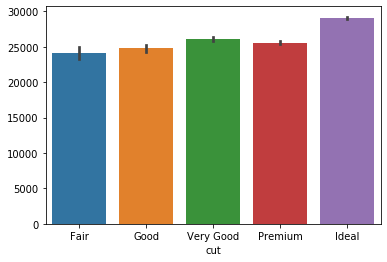

In [13]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

### Çaprazlamalar

In [14]:
from pandas.api.types import CategoricalDtype
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(ordered = True, categories = cut_kategoriler))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


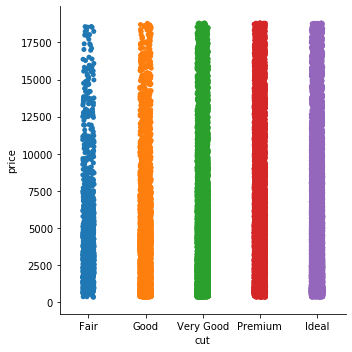

In [15]:
sns.catplot(x = "cut", y = "price", data = df);

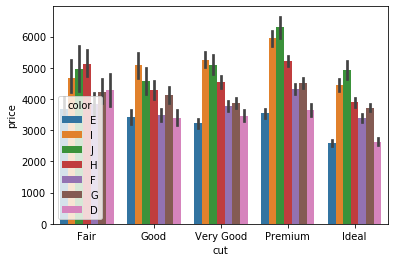

In [16]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

In [17]:
df.groupby(["cut","color"])["price"].mean().unstack()

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384


## Histogram ve Yoğunluk

In [18]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


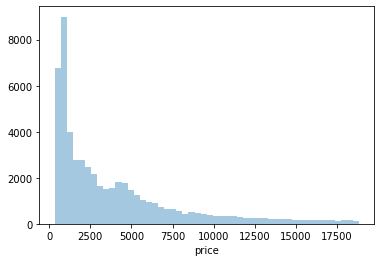

In [19]:
sns.distplot(df.price, kde = False);
# Sayısal değişkenlerinin dağılımını ifade etmek için kullanılır.1

In [20]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

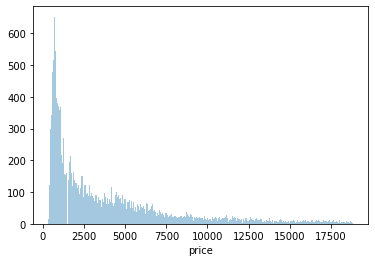

In [21]:
sns.distplot(df.price, kde = False, bins = 1000);

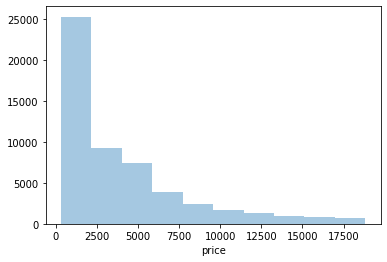

In [22]:
sns.distplot(df.price, kde = False, bins = 10);

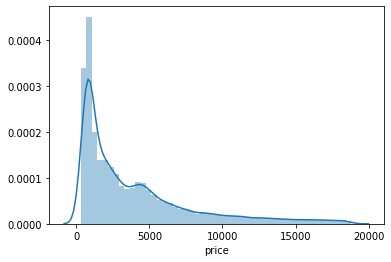

In [23]:
sns.distplot(df.price);

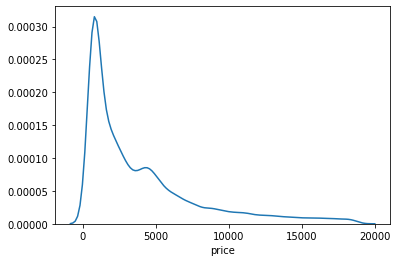

In [24]:
sns.distplot(df.price, hist = False);

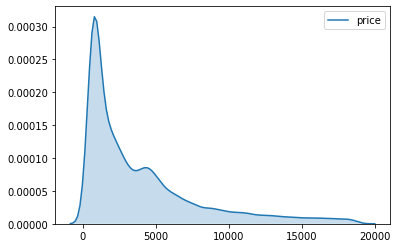

In [25]:
sns.kdeplot(df.price, shade = True);

### Çaprazlamalar

In [26]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


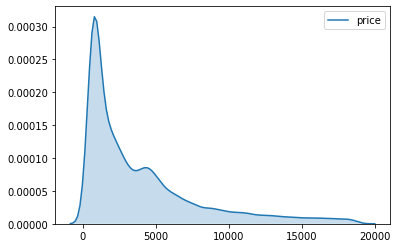

In [27]:
sns.kdeplot(df.price, shade= True);

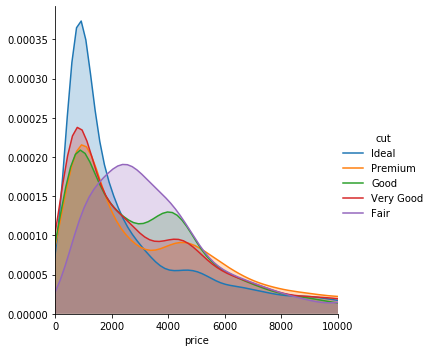

In [28]:
(sns
 .FacetGrid(df,
             hue = "cut",
             height = 5,
             xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend());

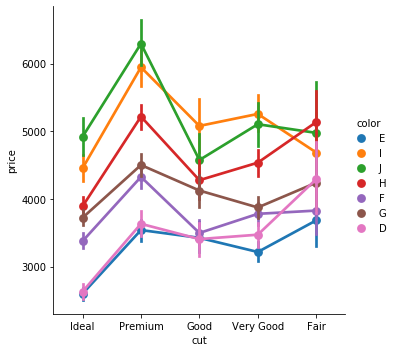

In [29]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## Boxplot

**Veri Seti Hikayesi**
* total_bill: yemeğin toplam fiyatı (bahşiş ve verigler dahil)
* tip: bahşiş
* sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)
* smoker: grupta sigara içen var mı? (0=no, 1=yes)
* day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)
* time: ne zaman? (0=day, 1=night)
* size: grupta kaç kişi var?

In [30]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy() 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [32]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [33]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [34]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [35]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

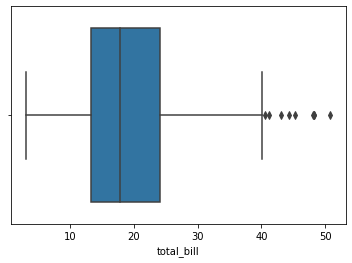

In [36]:
# boxplot
# kartiller aracılığyala bilgi sunan görselleştirme tekniği
sns.boxplot(x = "total_bill", data = df);

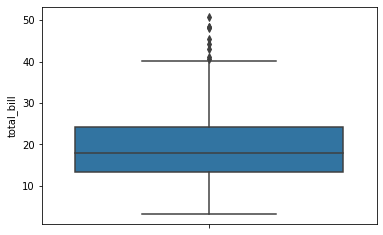

In [37]:
sns.boxplot(x = "total_bill", data = df, orient = "v");

.

.

.

.

.

.

.

.

### Çaprazlamalar

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [40]:
# Hangi günler daha fazla kazanıyoruz?

In [41]:
import pandas as pd
df.groupby(["day"])["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [42]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

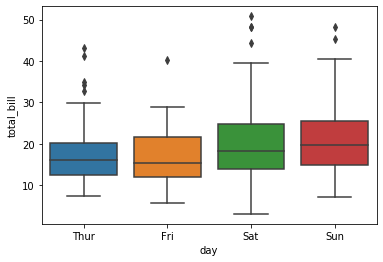

In [43]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [44]:
# Sabah mı Akşam mı daha öok kazanıyoruz?

In [45]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

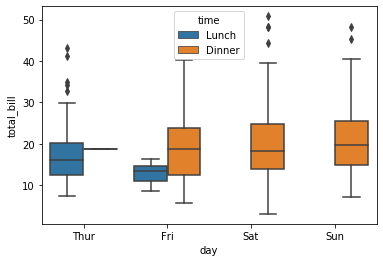

In [46]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = df);

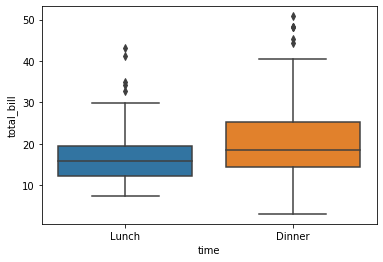

In [47]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [48]:
# Yemeğe gelen kişi sayısı ile kazancın doğru orantılı mı değil mi?

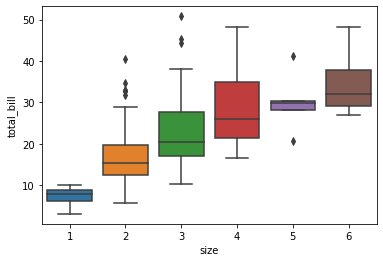

In [49]:
sns.boxplot(x = "size", y = "total_bill", data = df);

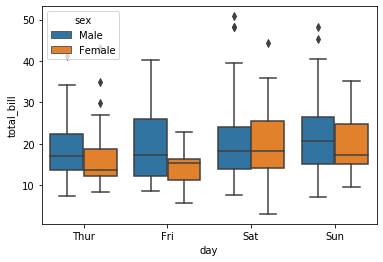

In [50]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

.

.

.

.

.

.

.

.

## Violin

In [51]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


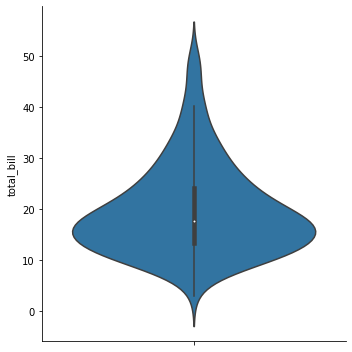

In [52]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

.

.

.

.

.

.

### Çaprazlama

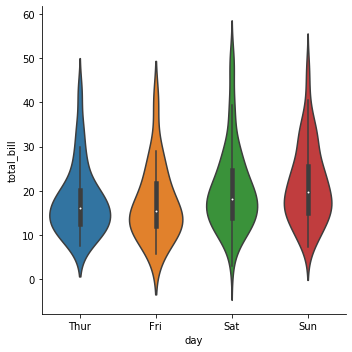

In [53]:
sns.catplot(x = "day", y = "total_bill", data = df, kind = "violin")

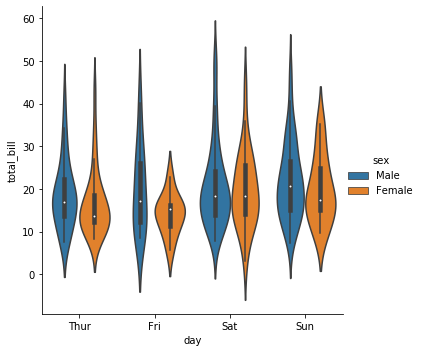

In [54]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", data = df, kind = "violin");